In [76]:
import numpy as np
import matplotlib.pyplot as plt 
import random                          # crear numeros aleatoriamente
import scipy.io as sio
from sklearn.model_selection import train_test_split


In [77]:
# cargar el archivo .mat
data = sio.loadmat('Tiosulfatosodio.mat')

#Extrayendo matriz de caracteristicas 
Xi = data['x']

#Extrayendo dato esperado (Clases)
Yi = data['y']

#Agregando el bias a las filas de la matriz de caracteristicas (Entradas)
bias = np.full((Xi.shape[0], 1), 1)
Xi = np.hstack((bias, Xi))

#numero de datos
num_datos = Xi.shape[0]

#numero de caracteristicas
caract = Xi.shape[1]-1                  # Se resta el bias 

#Obteniendo datos de entrenamiento y prueba
D_entre = int(num_datos*0.9)        # datos de entrenamiento   (verificar la cantidad de dtos para hacer la particion)
D_prueba = int(num_datos*0.1)            # datos de prueba

# Particion de datos
#X_ent = Xi[0:D_entre,:]                       # Datos de entrenamiento (caracteristicas)
#Y_ent = Yi[0:D_entre,:]  

#Particion datos prueba 
#X_pru = Xi[D_entre:D_entre+D_prueba,:]               # Datos de prueba (caracteristicas)
#Y_pru = Yi[D_entre:D_entre+D_prueba,:]

#Definicion de errores
Err_entr = 10;
Err_pru = 10;

X_ent, X_pru, Y_ent, Y_pru = train_test_split(Xi, Yi, test_size=0.1)



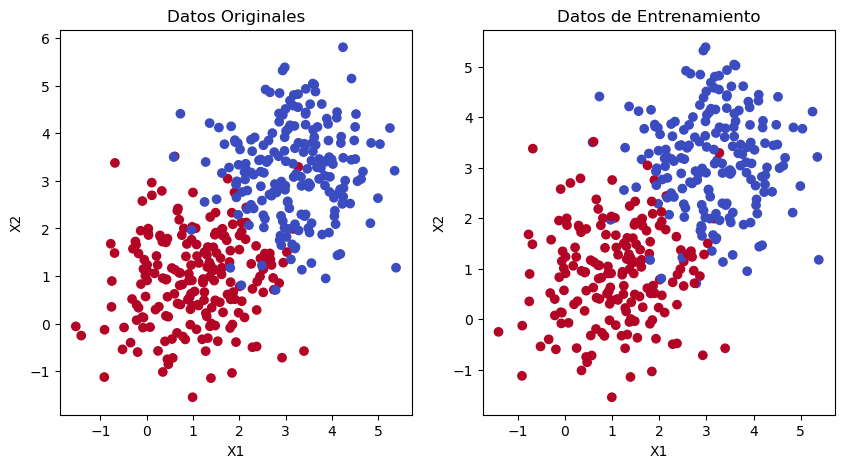

In [78]:
import matplotlib.pyplot as plt

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Graficar la segunda gráfica en el segundo subplot
ax1.scatter(Xi[:, 1], Xi[:, 2], c=Yi, cmap=plt.cm.coolwarm)
ax1.set_title('Datos Originales')
ax1.set_xlabel("X1")
ax1.set_ylabel("X2")

# Graficar la primera gráfica en el primer subplot
ax2.scatter(X_ent[:, 1], X_ent[:, 2], c=Y_ent, cmap=plt.cm.coolwarm)
ax2.set_title('Datos de Entrenamiento')
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")


# Mostrar la figura
plt.show()


In [79]:
#Definicion de los pesos e inicialización 
Wk = []  
for i in range(Xi.shape[1]):                      # ciclo para agregar los numeros aleatorios con los que se inicializaran los pesos
    Wk.append(random.uniform(0,1))                # vector de pesos extendido
print(Wk)


[0.8954949292439832, 0.7585708442143733, 0.0888367149860897]


In [80]:
error = []
error1 = []
e = 0
N=0
u=0.1
suma=0
iteraciones = 0
Emin = 10
#Eent=  0
print("Wo: ", Wk )

u = 0.1
u_min = 0.01
u_max = 0.3
gamma = 1.05
beta =  1.04
alpha = 0.7
errorP = []
sumap = 0

while(iteraciones<=400):

    ################## Error de entrenamiento  ###########################
    
    i = np.random.randint(0,X_ent.shape[0])#Xi.shape[0])
    print("iteraciones =",iteraciones,"\n")
    Y = Y_ent[i][0]
    g = np.dot(np.transpose(Wk),X_ent[i]) #Funcion interna de la neurona. matmul permite multiplicar dos matrices
    print("g: ", g)
    e = (g - Y)  #Error entre la salida dada y la salida esperada 
    print("error:",e)
    
    if g < -0.01:                   # se establece un umbral para poder hacer clasificacion con el algoritmo LMS
        g = -1
    else:
        g = 1
                
    if g != Y:          # Condicion de Error
        suma = suma + 1          # contador de errores
    
    print("Suma: ", suma)
    Eent = (100*suma)/D_entre
    print("Error entrenamiento: ", Eent)
    error.append(e)
    ########################################################################
    
    print('\n')
    ################# Error de prueba  ###############################
    
    ip = np.random.randint(0,X_pru.shape[0])#Xi.shape[0])
    Yp = Y_pru[ip][0]
    gp = np.dot(np.transpose(Wk),X_pru[ip]) #Funcion interna de la neurona. matmul permite multiplicar dos matrices
    print("gp: ", gp)
    ep = (gp - Yp)  #Error entre la salida dada y la salida esperada 
    print("errorP:",ep)
    
    if gp < 0:                   # se establece un umbral para poder hacer clasificacion con el algoritmo LMS
        gp = -1
    else:
        gp = 1
    
    
    if (gp != Yp):                           # Condicion de Error
        sumap = sumap + 1                    # contador de errores
    
    print("Sumap: ", sumap)
    Epru = (100*sumap)/((4000/(40))*D_prueba)
    print("Error prueba: ", Epru)
    errorP.append(ep)
    
    ####################################################################################
    
    print('\n')
    
    
    ############################## Error de Validacion #################################
    
    
    
    
    
    if( (error[iteraciones]/error[iteraciones-1])>beta):
        u = u*alpha
    elif(error[iteraciones]<error[iteraciones-1]):
        u = u*gamma
    
    print("Peso Wk: ", Wk , "\n")
    Wk = Wk - e*u*X_ent[i] #np.dot(value,Xi[i]) #Encuentro los nuevos valores de los pesos utilziando np.dot para multiplicar const * matriz
   

    iteraciones = iteraciones + 1;
    
    
    
    



Wo:  [0.8954949292439832, 0.7585708442143733, 0.0888367149860897]
iteraciones = 0 

g:  4.198274035365678
error: 5.198274035365678
Suma:  1
Error entrenamiento:  0.2777777777777778


gp:  -0.269815065985973
errorP: -1.269815065985973
Sumap:  1
Error prueba:  0.025


Peso Wk:  [0.8954949292439832, 0.7585708442143733, 0.0888367149860897] 

iteraciones = 1 

g:  -2.191053866050277
error: -3.191053866050277
Suma:  2
Error entrenamiento:  0.5555555555555556


gp:  -2.3723766110625144
errorP: -3.3723766110625144
Sumap:  2
Error prueba:  0.05


Peso Wk:  [ 0.37566753 -1.34368382 -1.28633786] 

iteraciones = 2 

g:  -5.605876413772391
error: -4.605876413772391
Suma:  2
Error entrenamiento:  0.5555555555555556


gp:  -0.6539376189825332
errorP: -1.6539376189825332
Sumap:  3
Error prueba:  0.075


Peso Wk:  [ 0.71072818 -1.03837389 -0.9366884 ] 

iteraciones = 3 

g:  2.0466920805289575
error: 3.0466920805289575
Suma:  3
Error entrenamiento:  0.8333333333333334


gp:  1.0415834516617397
errorP: 

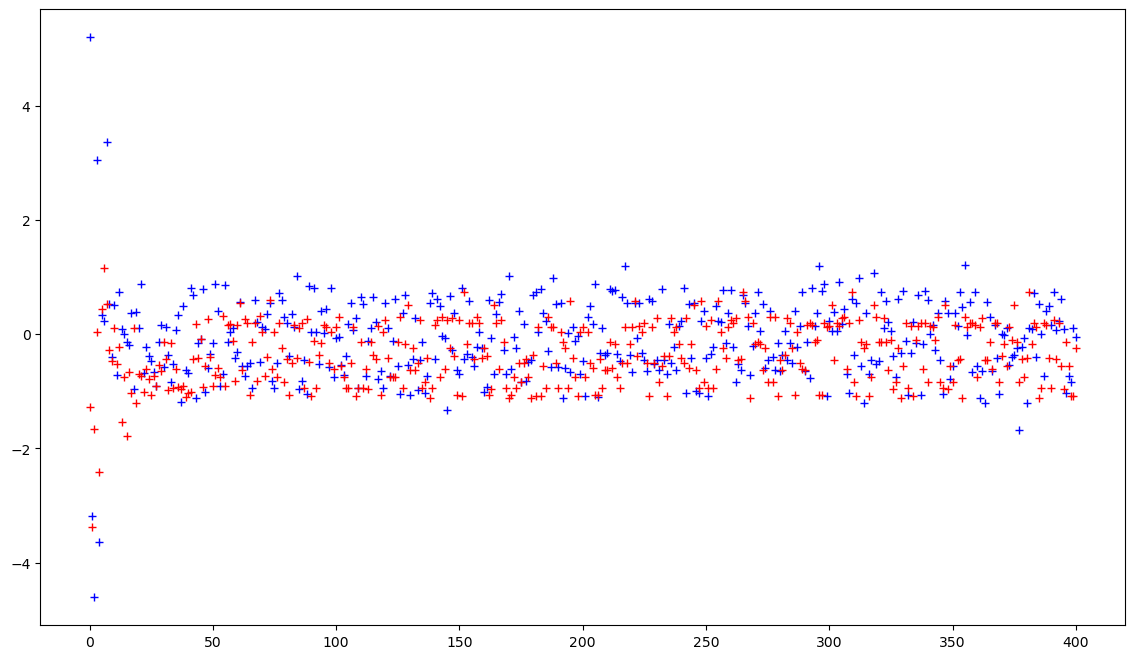

In [81]:
plt.figure(figsize=(14,8))
plt.plot(error, 'b+')
plt.plot(errorP, 'r+')